# Data Visualization with MatplotLib

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10,6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [3]:
%matplotlib inline

## Matplotlib API 介绍

In [4]:
import matplotlib.pyplot as plt

**Figures and subplots**

In [5]:
fig = plt.figure()

In [6]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [7]:
type(ax2)

matplotlib.axes._subplots.AxesSubplot

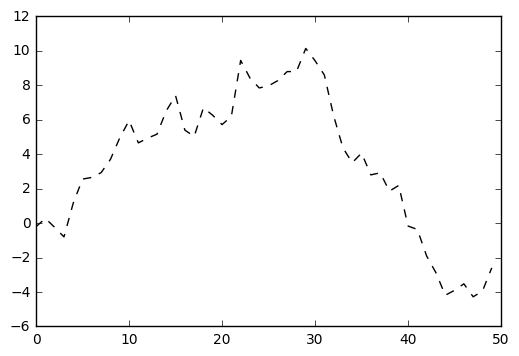

In [8]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')  # 此处只提供了y值，x从0开始递增，k表示黑色，--表示使用dash line

In [9]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

In [10]:
plt.close('all')  # 关闭当前的窗口

[[<matplotlib.axes._subplots.AxesSubplot object at 0x114c593d0>


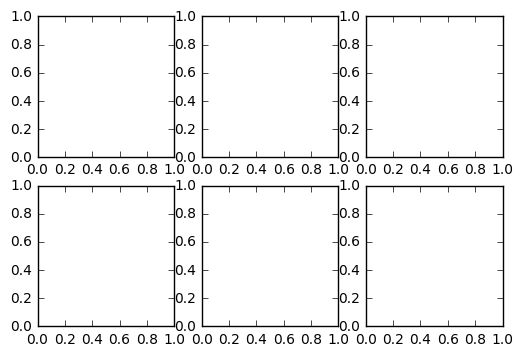

In [11]:
fig, axes = plt.subplots(2,3)
print axes

**调整 subplot 间距**

In [12]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

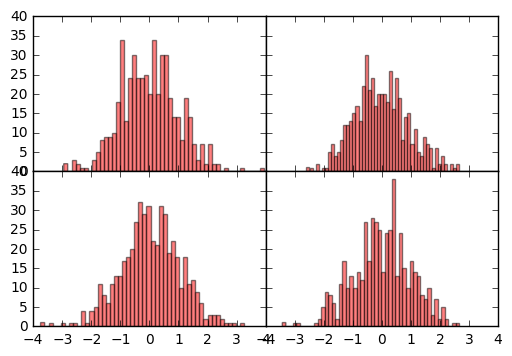

In [13]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='r', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

**线条格式**

In [14]:
plt.figure()

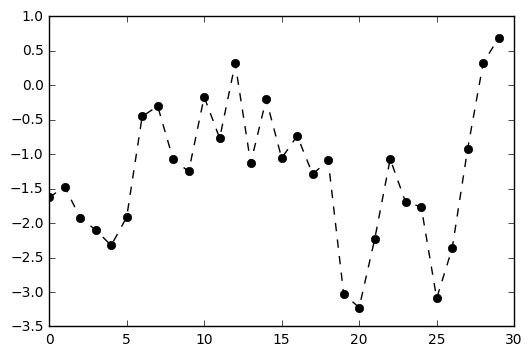

In [15]:
plt.plot(randn(30).cumsum(), 'ko--')

In [16]:
plt.close('all')

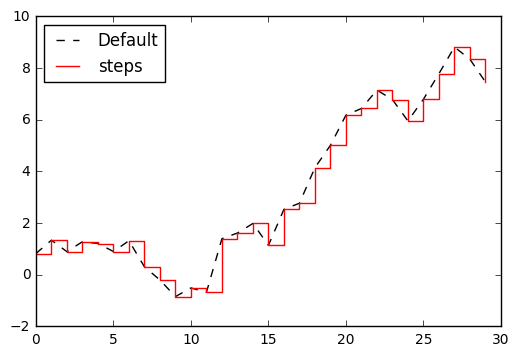

In [17]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps')
plt.legend(loc='best')

**Ticks, labels and legends**

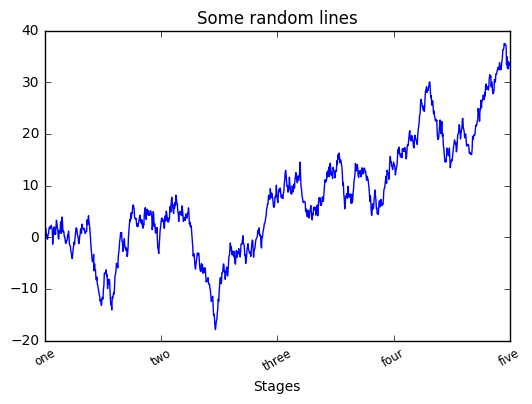

In [18]:
# set title, axes labels, ticks and tick tables
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('Some random lines')
ax.set_xlabel('Stages')

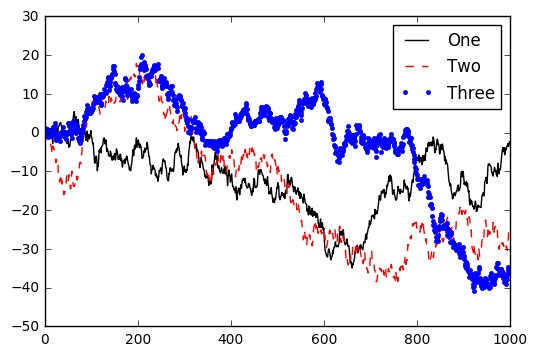

In [19]:
# add legends
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='One')
ax.plot(randn(1000).cumsum(), 'r--', label='Two')
ax.plot(randn(1000).cumsum(), 'b.', label='Three')

ax.legend(loc='best')

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

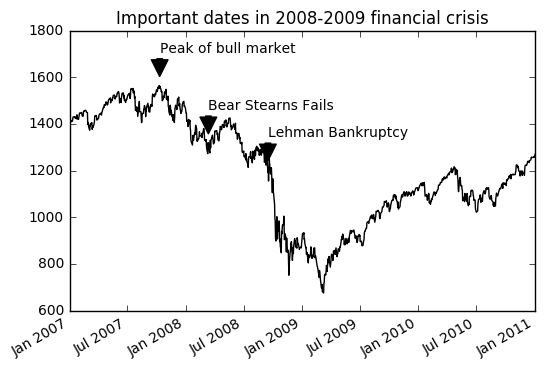

In [21]:
# subplot 做标记
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('./data/spx.csv', index_col = 0, parse_dates=True)
spx = data['SPX']
print spx

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+50),
                xytext=(date, spx.asof(date)+200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', 
                verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

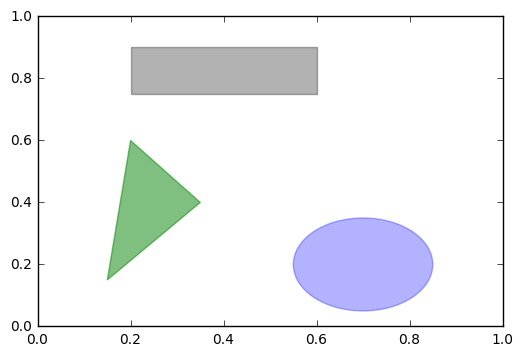

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

**Saving plots to file**

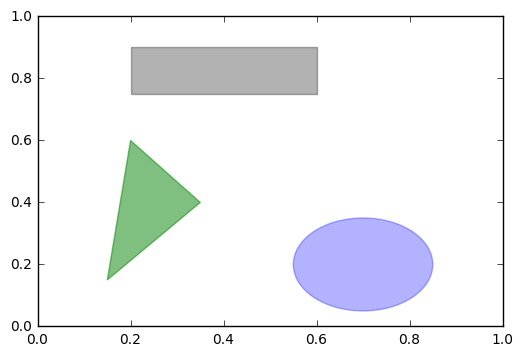

In [23]:
fig

In [25]:
fig.savefig('figpath.svg')

In [26]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [27]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

In [28]:
plot_data

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x01\x90\x08\x06\x00\x00\x00r5\x1e\x98\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00\x07&IDATx\x9c\xed\xd6\xc1\t\x00 \x10\xc00u\xff\x9d\xcf%\n\x82$\x13\xf4\xd9=3\xb3\x00\x00\xc8\x9c\xd7\x01\x00\x00\xbf1X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103X\x00\x001\x83\x05\x00\x103

**Matplotlib confuguration**

In [29]:
plt.rc('figure', figsize=(10,10))

## Ploting functions in Pandas

**Line plots**

In [31]:
plt.close('all')

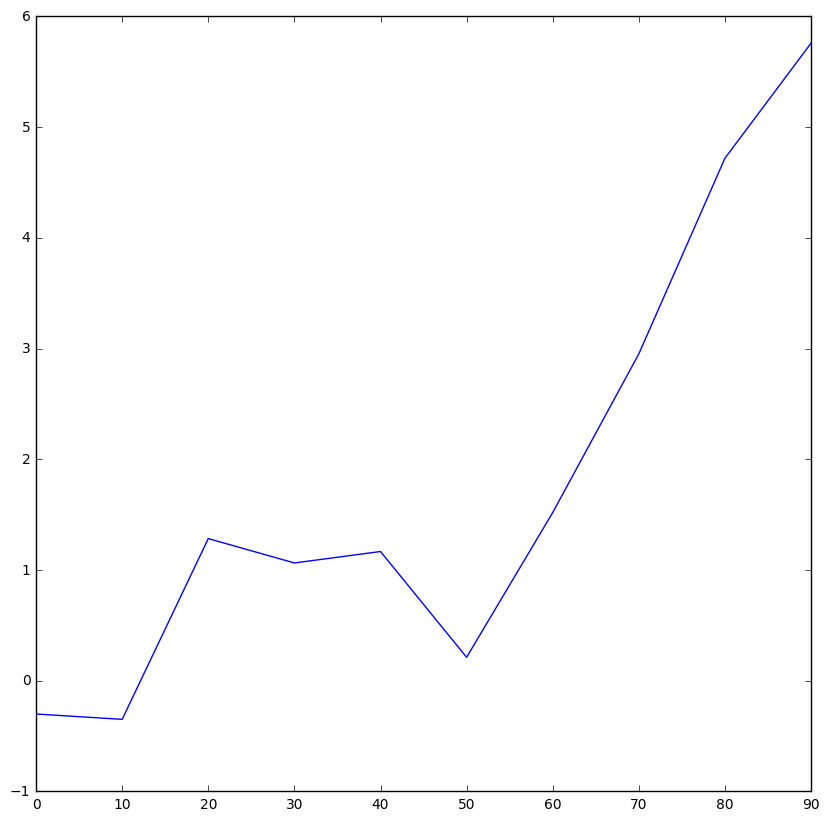

In [33]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

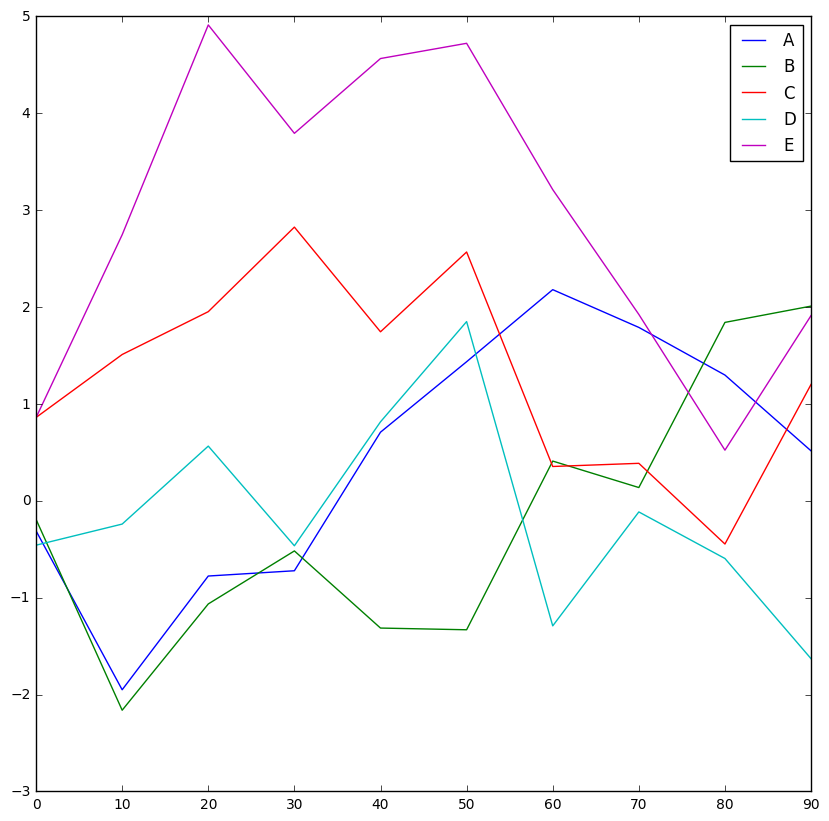

In [34]:
df = DataFrame(np.random.randn(10,5).cumsum(0), columns=['A', 'B', 'C', 'D', 'E'], index=np.arange(0, 100, 10))
df.plot()

**Bar plots**

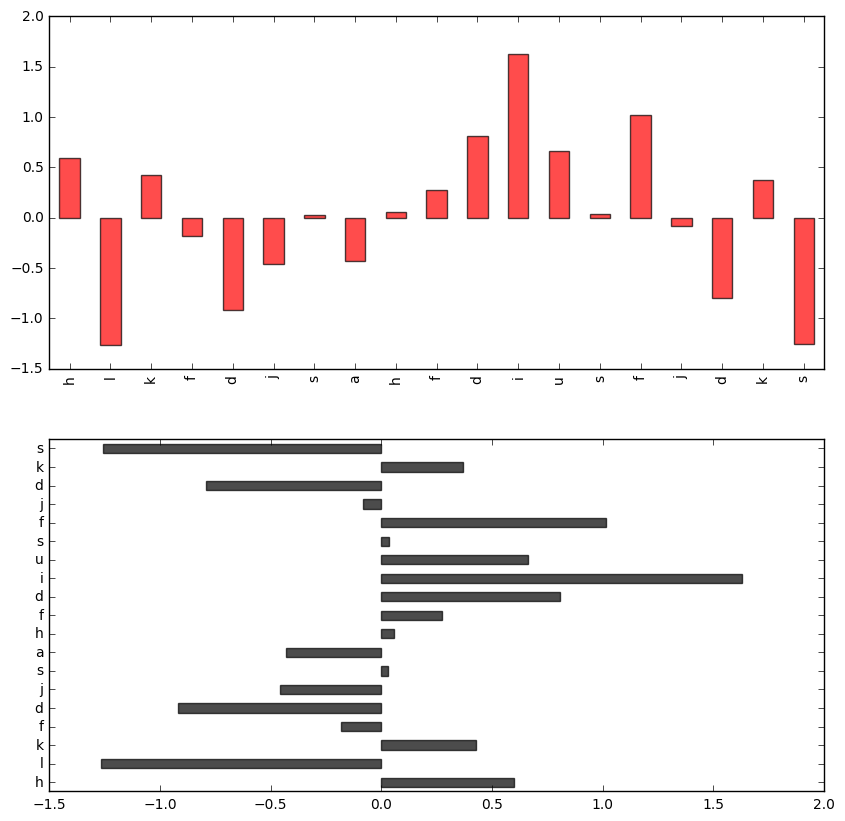

In [37]:
fig, axes = plt.subplots(2,1)
data = Series(np.random.randn(19), index=list('hlkfdjsahfdiusfjdks'))
data.plot(kind='bar', ax=axes[0], color='r', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

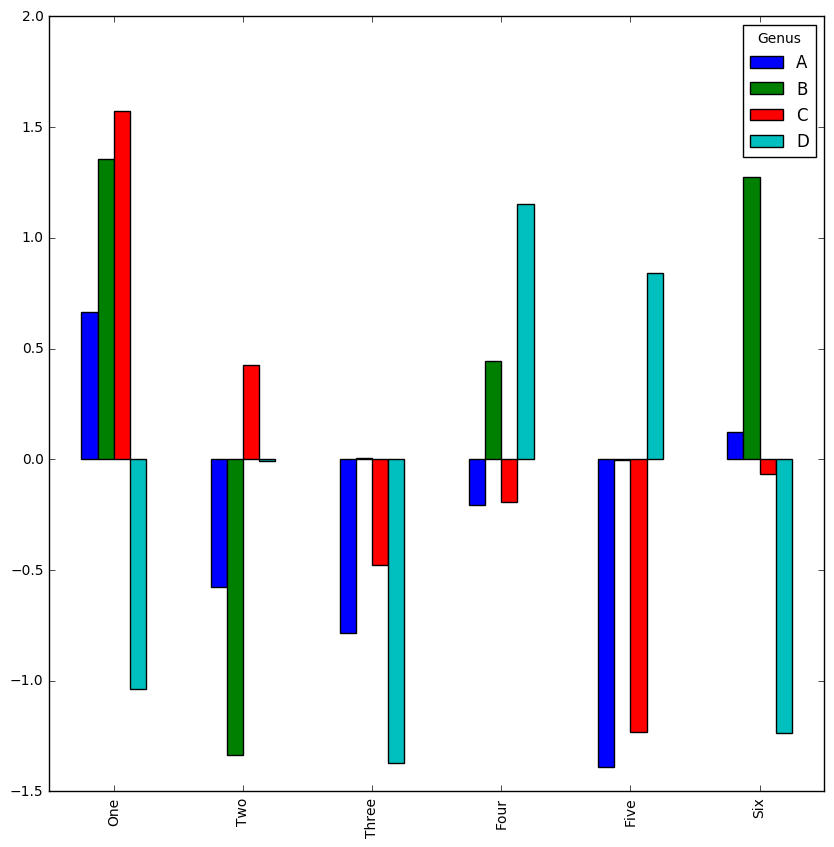

In [38]:
df = DataFrame(np.random.randn(6,4),
              index=['One', 'Two', 'Three', 'Four', 'Five', 'Six'],
              columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [39]:
plt.figure()

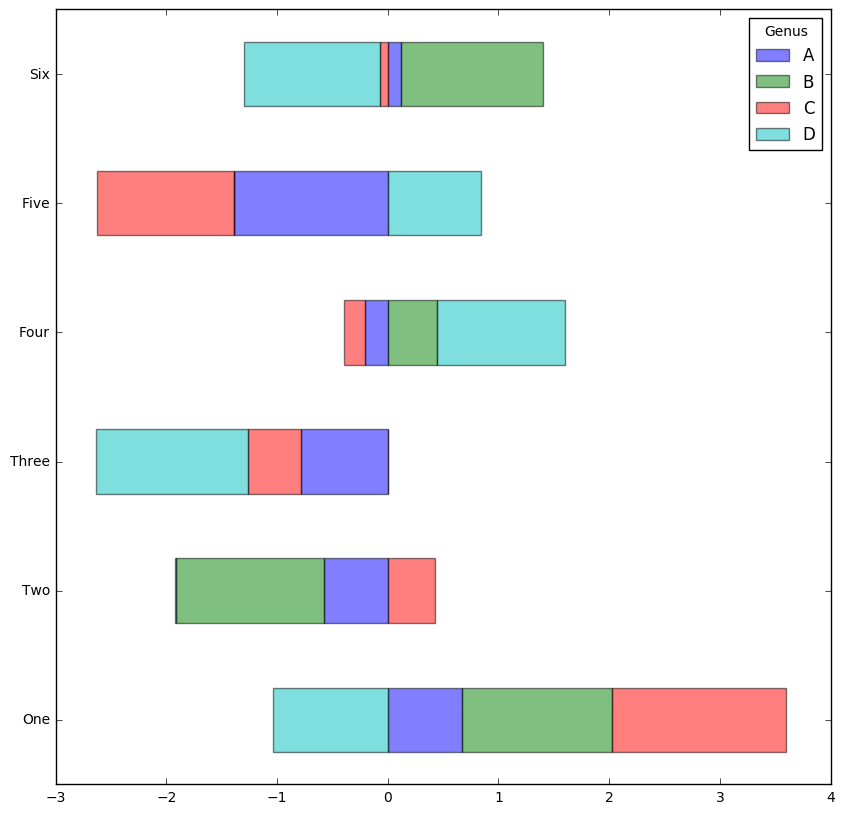

In [40]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [41]:
tips = pd.read_csv('./data/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

**Histograms and density plots**

In [42]:
plt.figure()

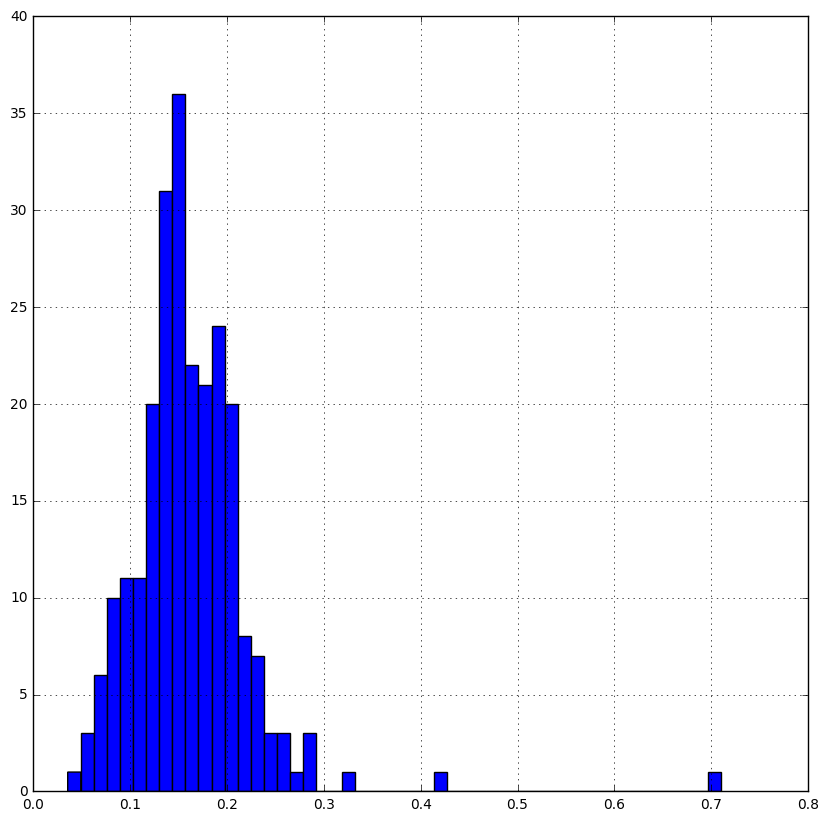

In [43]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [44]:
plt.figure()

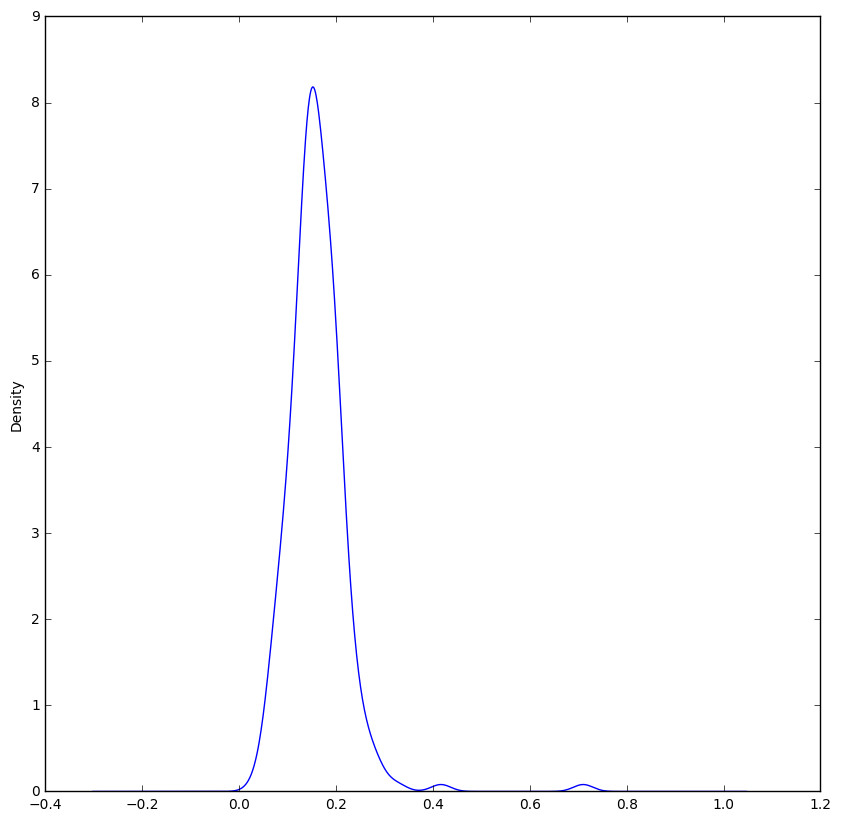

In [45]:
tips['tip_pct'].plot(kind='kde')

In [46]:
plt.figure()

(200,)


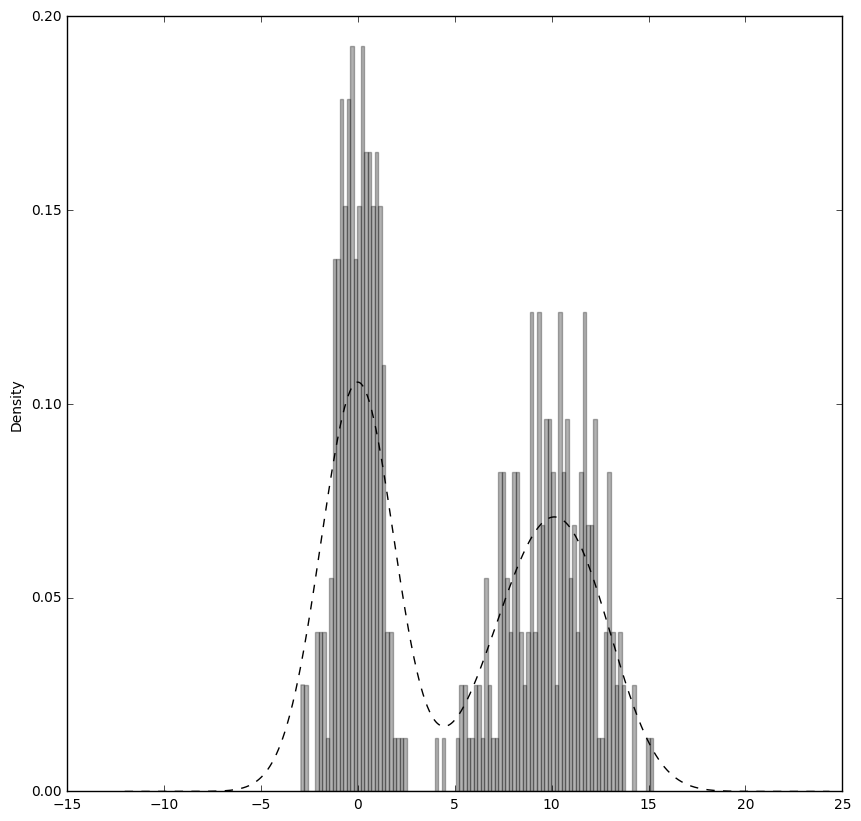

In [51]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
print comp1.shape
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

**Scatter plots**

In [53]:
macro = pd.read_csv('./data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [54]:
plt.figure()

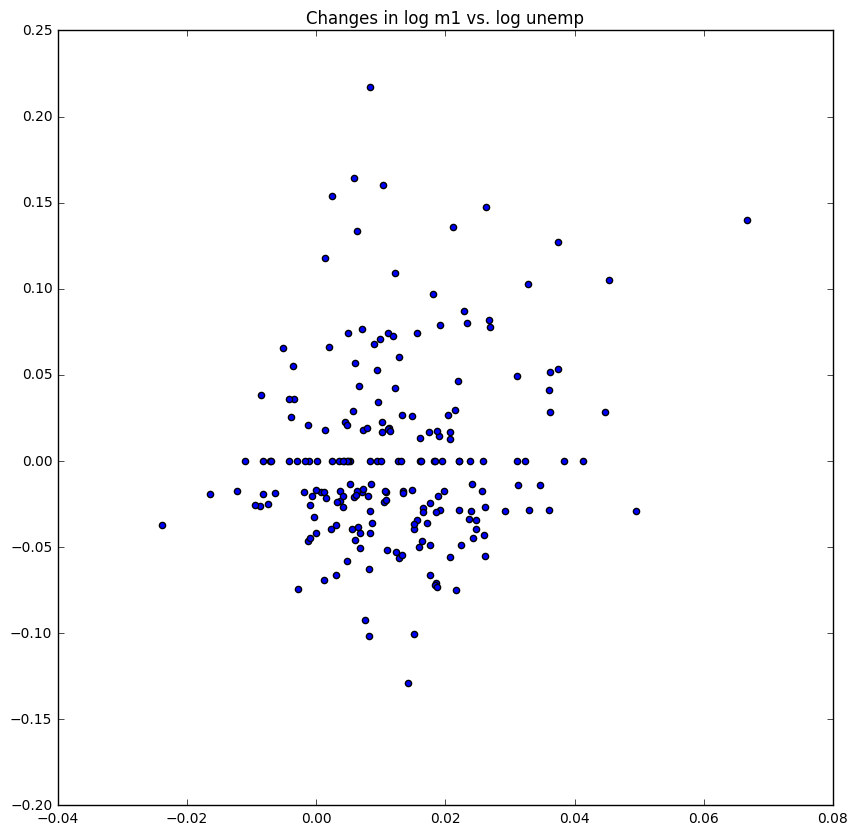

In [55]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' %('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11efed490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1206ee5d0>]], dtype=object)

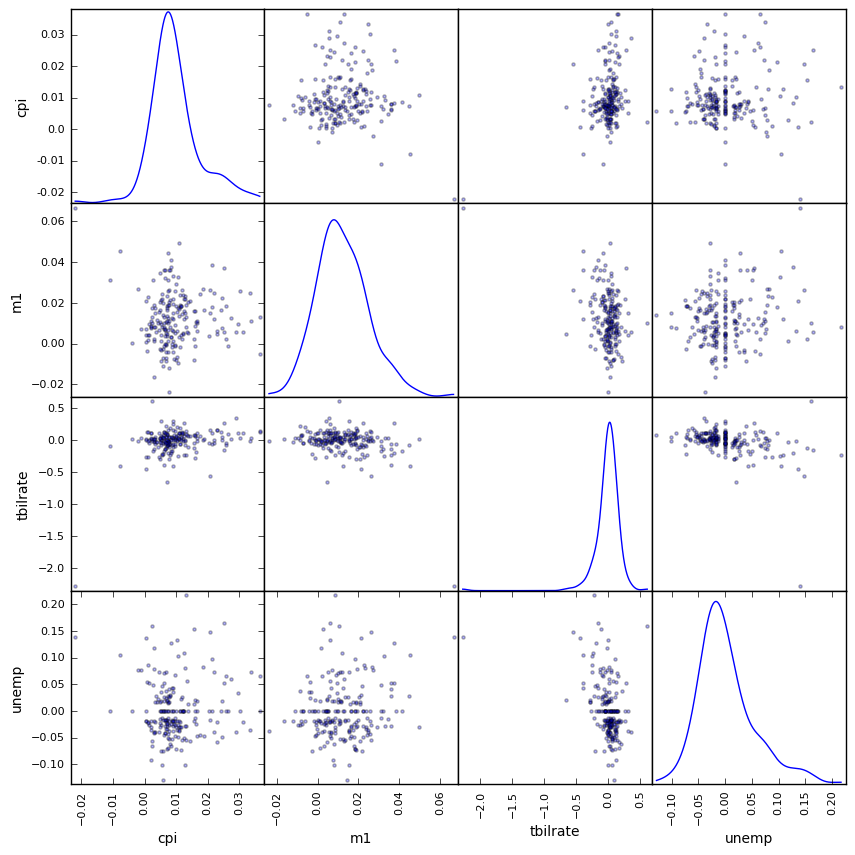

In [56]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## Ploting Maps: Visualizing Haiti Earthquake Crisis data

In [57]:
data = pd.read_csv('./data/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [59]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [60]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object